# PROJECT 5-2
## AMIR MAHDI MOHAMADIAN
### 810197651

در این پروژه قصد داریم با دو کتاب خوانه ذکر شده یک نورال نتورک بسازیم که عکس های صورت مردم رو میگیره و نژاد اونارو پریدیکت کنه

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorboard
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os
import matplotlib.image as mpimg

# Phase #1

در این قسمت فایل زیپ را اکسترکت میکنیم

In [ ]:
import shutil
shutil.unpack_archive("/content/drive/MyDrive/UTKFace.tar.gz", "/content/drive/MyDrive/files")

In [5]:
image_path, races = [], []
for image in os.listdir("/content/drive/MyDrive/files/UTKFace"):
  curr = image.split('.')
  if len(curr[0].split('_')) == 4:
    image_path.append(os.path.join("/content/drive/MyDrive/files/UTKFace", image))
    AGE, GENDER, RACE, DATE = curr[0].split('_')
    races.append(int(RACE))
  else:
    continue

In [6]:
class_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}
races =[str(to_categorical(i, len(class_labels))) for i in races]

In [7]:
df = pd.DataFrame({
    'image': image_path,
    'race': races
})

In [8]:
df

,image,race
0,/content/drive/MyDrive/files/UTKFace/32_0_2_20...,[0. 0. 1. 0. 0.]
1,/content/drive/MyDrive/files/UTKFace/55_0_0_20...,[1. 0. 0. 0. 0.]
2,/content/drive/MyDrive/files/UTKFace/62_0_0_20...,[1. 0. 0. 0. 0.]
3,/content/drive/MyDrive/files/UTKFace/12_0_0_20...,[1. 0. 0. 0. 0.]
4,/content/drive/MyDrive/files/UTKFace/12_1_0_20...,[1. 0. 0. 0. 0.]
...,...,...
23700,/content/drive/MyDrive/files/UTKFace/22_0_1_20...,[0. 1. 0. 0. 0.]
23701,/content/drive/MyDrive/files/UTKFace/26_1_2_20...,[0. 0. 1. 0. 0.]
23702,/content/drive/MyDrive/files/UTKFace/43_1_0_20...,[1. 0. 0. 0. 0.]
23703,/content/drive/MyDrive/files/UTKFace/18_0_3_20...,[0. 0. 0. 1. 0.]


In [9]:
dg = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)

In [10]:
train = dg.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'race',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
  subset = "training",
  shuffle = True
)

Found 16594 validated image filenames belonging to 5 classes.


In [11]:
test = dg.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'race',
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
  subset = "validation",
  shuffle = True
)

Found 7111 validated image filenames belonging to 5 classes.


<BarContainer object of 5 artists>

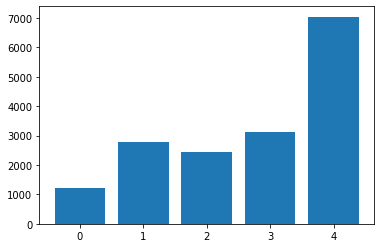

In [12]:
plt.bar(x=np.unique(train.classes), height = np.unique(train.classes, return_counts=True)[1])

<BarContainer object of 5 artists>

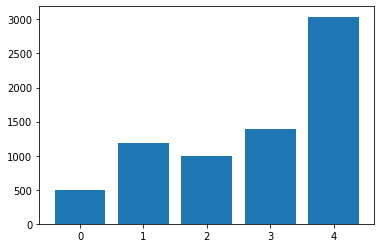

In [13]:
plt.bar(x=np.unique(test.classes), height = np.unique(test.classes, return_counts=True)[1])

# Phase #2

In [16]:
LEARNING_RATE = 0.01
input = layers.Input(shape=(100, 100, 1))
out = layers.Flatten()(input)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(512, activation="relu")(out)
out = layers.Dense(5, activation="softmax")(out)

In [17]:
nn = models.Model(inputs=input, outputs=out)

In [19]:
nn.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE), loss="categorical_crossentropy", metrics=['accuracy'])

In [21]:
nn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              10241024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


In [23]:
his = nn.fit(train, validation_data=test, epochs=10)

Epoch 1/10
519/519 [==============================] - ETA: 0s - loss: 1.2962 - accuracy: 0.4887

KeyboardInterrupt: ignored

In [26]:
y_pred = nn.predict(test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(test)):
    test.append(np.argmax(tesr=t[i]))

KeyboardInterrupt: ignored

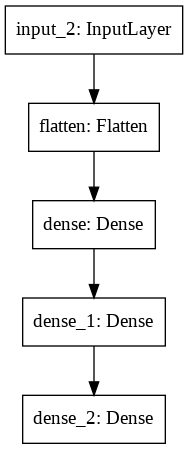

In [24]:
utils.plot_model(nn)

In [25]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)

NameError: ignored